In [1]:
# Import required libraries
import pandas as pd
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, r2_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier

In [2]:
csv_file_2 = 'paysim/paysim.csv'

In [3]:
# Read the PaySim dataset
df2 = pd.read_csv(csv_file_2)

In [4]:
# One-hot encode the categorical column ('type') in the PaySim dataset
df2 = pd.get_dummies(df2, columns=['type'], drop_first=True)

In [5]:
# Exclude the identifier columns ('nameOrig' and 'nameDest') from the PaySim dataset
df2 = df2.drop(['nameOrig', 'nameDest'], axis=1)

In [6]:
# Function to calculate metrics
def calculate_metrics(y_true, y_pred):
    f1 = f1_score(y_true, y_pred)
    return f1

In [7]:
# Function to apply SMOTE and save the resampled dataset
def apply_smote_and_save(df, target_column, save_path):
    # Separate input features (X) and target labels (y)
    X = df.drop(target_column, axis=1)
    y = df[target_column]

    # Calculate metrics before SMOTE
    print("\nMetrics before SMOTE:")
    print("Class distribution:")
    print(y.value_counts())
    print("Mean:", np.mean(y))
    print("Variance:", np.var(y))
    print("Standard Deviation:", np.std(y))

    # Apply SMOTE
    smote = SMOTE(random_state=42)
    X_resampled, y_resampled = smote.fit_resample(X, y)

    # Combine resampled data into a DataFrame
    df_resampled = pd.concat([pd.DataFrame(X_resampled), pd.DataFrame(y_resampled, columns=[target_column])], axis=1)

    # Save the resampled dataset to the specified path
    df_resampled.to_csv(save_path, index=False)
    print(f"Resampled dataset saved to {save_path}")

    # Calculate metrics after SMOTE
    print("\nMetrics after SMOTE:")
    print("Class distribution:")
    print(y_resampled.value_counts())
    print("Mean:", np.mean(y_resampled))
    print("Variance:", np.var(y_resampled))
    print("Standard Deviation:", np.std(y_resampled))

    # Return the resampled dataframe for inspection
    return df_resampled

In [8]:
# Apply SMOTE to PaySim dataset
df2_resampled = apply_smote_and_save(df2, 'isFraud', 'dataset2_resampled.csv')


Metrics before SMOTE:
Class distribution:
0    6354407
1       8213
Name: isFraud, dtype: int64
Mean: 0.001290820448180152
Variance: 0.0012891542307507113
Standard Deviation: 0.03590479398006221
Resampled dataset saved to dataset2_resampled.csv

Metrics after SMOTE:
Class distribution:
1    6354407
0    6354407
Name: isFraud, dtype: int64
Mean: 0.5
Variance: 0.25
Standard Deviation: 0.5


In [9]:
# Check the class distribution after SMOTE for the PaySim dataset
print("Class distribution after SMOTE for PaySim dataset:")
print(df2_resampled['isFraud'].value_counts())

Class distribution after SMOTE for PaySim dataset:
1    6354407
0    6354407
Name: isFraud, dtype: int64


In [10]:
# Function to plot bar graph for class distribution with custom labels
def plot_class_distribution(df, target_column, title):
    sns.set(style="whitegrid")
    plt.figure(figsize=(6, 4))

    # Plot the bar graph
    sns.countplot(x=target_column, data=df, palette="viridis")

    # Add titles and labels
    plt.title(title)
    plt.xlabel('Class')
    plt.ylabel('Count')

    # Set custom x-axis labels for the classes
    plt.xticks([0, 1], ['Non-Fraudulent Class (0)', 'Fraudulent Class (1)'])

    # Show the plot
    plt.show()

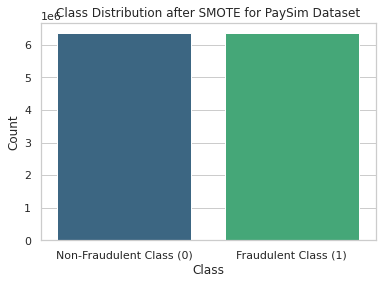

In [11]:
# Plot class distribution for PaySim dataset after SMOTE
plot_class_distribution(df2_resampled, 'isFraud', 'Class Distribution after SMOTE for PaySim Dataset')

In [12]:
# Function to split the data, train a model, and compute R²
def compute_r2_score(df, target_col):
    # Separate features and target
    X = df.drop(target_col, axis=1)
    y = df[target_col]

    # Split the data into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    # Initialize a Random Forest Classifier
    model = RandomForestClassifier(random_state=42)

    # Train the model
    model.fit(X_train, y_train)

    # Predict on the test set
    y_pred = model.predict(X_test)

    # Compute the R² score
    r2 = r2_score(y_test, y_pred)

    return r2

In [13]:
# Compute R² score for the PaySim dataset (after SMOTE)
print("R² Score for PaySim Dataset after SMOTE:")
r2_2 = compute_r2_score(df2_resampled, 'isFraud')
print(f"R² Score for PaySim Dataset: {r2_2}")

R² Score for PaySim Dataset after SMOTE:
R² Score for PaySim Dataset: 0.9985626776161235
